# Linear Regression
##### Linear Regression is a Linear modelling approach to finding the Best Fitted Line, in such a way that the distance of each point from this line, is minimum..
##### Two types -
##### Simple Linear Regression
deals with only one Independent Variable...

##### Multiple Linear Regression
deals with multiple Independent Variables...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
# loading datasets..
df = pd.read_csv(r"C:\Users\Dell\dataSets\bangalore_house_price_prediction_data.csv")
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Splitting dataset into dependent and target variable...
X = df.drop('price', axis=1)
y = df['price']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print("The Shape of X_train", X_train.shape)
print("The Shape of X_test", X_test.shape)
print("The Shape of y_train", y_train.shape)
print("The Shape of y_test", y_test.shape)

The Shape of X_train (5696, 107)
The Shape of X_test (1424, 107)
The Shape of y_train (5696,)
The Shape of y_test (1424,)


In [5]:
# Scaling datasets... Standardization..
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Implementation Of Linear Regression : Supervised Machine Learning Algorithm

In [6]:
# Creating object from LinearRegression() Class...
lr = LinearRegression()

# Learning from Data and the Output...
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
# Showing the weight of The Regression : Weight is the response variable, which determines
# the influence of the input will have on the output...

lr.coef_   # 'coef_' attribute is used to check the Weight

array([-5.70206143e+00, -1.25679916e+00,  8.27341833e+01, -1.44906911e+01,
        5.75662723e+01,  1.88468905e-01, -1.72593897e+00, -4.51058311e+00,
       -2.22589244e+00, -4.28978455e+00, -2.44590976e+00,  5.40246226e-01,
       -1.03633400e+00,  1.43064873e+00, -6.25029424e-02, -1.51548783e+00,
       -2.14422789e-01,  2.16244155e+00, -1.48710228e+00,  1.95250816e+00,
       -3.10761125e+00, -1.28138668e+00, -1.01367155e+00,  1.37968545e-02,
        1.10383858e+00,  1.26497611e+00, -3.52405517e+00, -1.21398741e+00,
       -5.04622019e-01,  1.46299181e+00, -5.50064233e-01, -8.46468162e-02,
        6.84882188e-01, -1.39849820e+00, -1.94761710e-02, -1.57716300e+00,
        4.20886278e-01,  8.03443207e-01,  2.99182164e+00,  3.86430413e-03,
        1.05037261e-01,  2.89115612e-01, -3.16916626e-01,  1.05625868e+00,
       -1.39649279e+00, -3.10533604e+00,  1.01764011e-01, -7.49672917e-02,
       -8.03271555e-01, -1.27061856e+00, -8.54046164e-01,  2.64566484e-01,
        9.10688839e-01, -

In [8]:
lr.intercept_   # 'intercept_' attribute is used to check the Interception of the Regression Line with Y-axis...

95.0802729985955

### Prediction of the Home Price from the 'Test' dataset..

In [9]:
# Prediction from the 1st Row of the 'test' data only.
lr.predict([X_test[0, :]])

array([76.90661876])

In [10]:
# Pediction from All Rows..
y_pred = lr.predict(X_test)
y_pred

array([ 76.90661876,  15.25005377, 113.6828165 , ...,  21.30296864,
        71.43462962, 230.0414626 ])

In [11]:
# and this was the expected data... see the difference
y_test

2435     80.00
3113     40.00
426     120.00
1124     79.00
1161     45.00
         ...  
2078     28.34
6855     84.00
4381     32.00
3862     63.00
43      180.00
Name: price, Length: 1424, dtype: float64

### Finding the Accuracy of the Model...

In [12]:
lr.score(X_test, y_test) # accuracy will lie between 0 to 1

 # 1 is the best accuracy possible..

0.7903837092682257

##### Well 0.79 or 79% accuracy is a Good Accuracy for a ML Model..
##### lets Evaluate our ML Model by calculating Residuals or Errors

In [13]:
from sklearn import metrics

In [14]:
# Mean Absolute Error...
MAE = metrics.mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error is ", MAE)

# Mean Squared Error...
MSE = metrics.mean_squared_error(y_test, y_pred)
print("The Mean Squared Error is ", MSE)

# Root Mean Squared Error...
RMSE = np.sqrt(MSE) #just square root the mean squared error...
print("The Root Mean Squared Error is ", RMSE)

The Mean Absolute Error is  19.091147376118712
The Mean Squared Error is  4211.80690582332
The Root Mean Squared Error is  64.898435311056


#### WE can also Plot the Scatterplot and the Regression line

In [15]:
# coverting the numpy array into dataframe to implement graphs..

X_test_df = pd.DataFrame(X_test, columns = X.columns)

<function matplotlib.pyplot.show(close=None, block=None)>

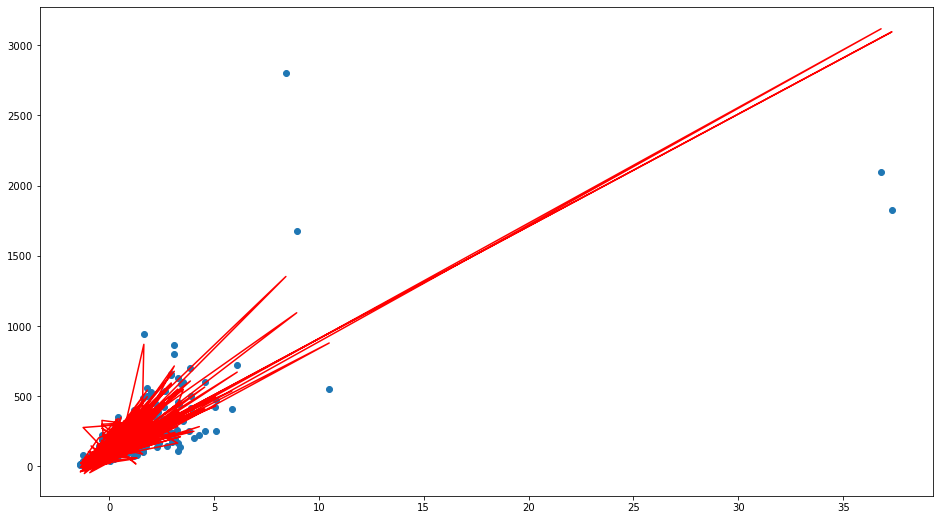

In [16]:
plt.figure(figsize=(16,9))

plt.scatter(X_test_df['total_sqft_int'], y_test)
plt.plot(X_test_df['total_sqft_int'], y_pred, color='r')
plt.show

### Ridge and Lasso Regression..

In [17]:
from sklearn.linear_model import Ridge, Lasso

In [20]:
rd = Ridge() #Creating an object of class Ridge()

rd.fit(X_train,y_train)  #Learning data from the database...

rd.score(X_test, y_test)  #you will se the model's accuracy has increased slightly..

0.7905686374336629

In [22]:
ls = Lasso()  #Creating an object of Lasso() class

ls.fit(X_train, y_train) # learning data from the train database..

ls.score(X_test, y_test)  #you will see the model's accuracy will be increased more

0.8036373003525776

#### Use of alpha parameter..

In [23]:
#See the theory of ridge and lasso to know about lambda or alpha value...

rd2 = Ridge(alpha = 2) #Creating an object of class Ridge(), with alpha value 2

rd2.fit(X_train,y_train)  #Learning data from the database...

rd2.score(X_test, y_test)  #you will se the model's accuracy has increased slightly..

0.7907530260397941

In [24]:
#See the theory of ridge and lasso to know about lambda or alpha value...

ls2 = Lasso(alpha = 2) #Creating an object of class Lasso(), with alpha value 2

ls2.fit(X_train,y_train)  #Learning data from the database...

ls2.score(X_test, y_test)  #you will se the model's accuracy has increased slightly..

0.81601815337036

In [25]:
#See the theory of ridge and lasso to know about lambda or alpha value...

ls3 = Lasso(alpha = 3) #Creating an object of class Lasso(), with alpha value 3

ls3.fit(X_train,y_train)  #Learning data from the database...

ls3.score(X_test, y_test)  #you will se the model's accuracy has increased slightly..

0.8263450613017427

#### Now 82% is a very good Accuracy in Linear Regression algorithm...
Let us discuss about polynomial regression to increase the accuracy.

## Polynomial Regression..

Sometimes the data follows a curve, so using a straight regression line... is not give that level of accuracy inspite of being the best fitted.. In that case we use polynomial regression Model using Polynomial features...

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly_reg = PolynomialFeatures(degree = 2)
# well using higher degree poynomial can increase accuracy but Computation time will be very high
# for larger dataset... and it also makes the model overfitted.. i.e. it can predict for well for a new value...

poly_reg.fit(X_train)

X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [31]:
X_train_poly.shape, X_test_poly.shape

((5696, 5886), (1424, 5886))

you can see that the columns of the dataframe is increased significantly... as we are dividing them into various polynomial features of higher degree

In [39]:
# now we have to apply LinearRegression model..
lr = LinearRegression()

lr.fit(X_train_poly, y_train)


LinearRegression()

In [38]:
# check the score..
lr.score(X_test_poly, y_test)

0.9997612445586842

In [42]:
# now this is a brlliant accuracy..
y_pred = lr.predict(X_test_poly)
y_pred

array([ 80.,  40., 120., ...,  32.,  63., 180.])

In [41]:
# compare the values... with original dataset
y_test

2435     80.00
3113     40.00
426     120.00
1124     79.00
1161     45.00
         ...  
2078     28.34
6855     84.00
4381     32.00
3862     63.00
43      180.00
Name: price, Length: 1424, dtype: float64